In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv ('C:/Users/thale/Desktop/Piyose/demand_forecasting_data.csv')
df.head()

,Date,Product_ID,Base_Sales,Marketing_Campaign,Marketing_Effect,Seasonal_Trend,Seasonal_Effect,Price,Discount,Competitor_Price,Stock_Availability,Public_Holiday,Demand
0,2019-01-01,P002,65,Social Media,1.634270,Spring,1.0,73.496059,0.078198,64.173418,491,False,60570
1,2019-01-01,P004,94,Social Media,1.240566,Summer,1.2,74.271862,0.182151,69.571391,135,True,18143
2,2019-01-01,P003,125,Radio,1.087600,Summer,1.2,35.274616,0.102592,27.331268,180,False,37412
3,2019-01-01,P004,128,TV,1.831657,Winter,0.8,79.524248,0.196125,73.429502,227,False,40773
4,2019-01-01,P001,51,Radio,1.285161,Fall,1.1,96.237402,0.079253,88.243871,338,False,26917


In [4]:
# Convert the 'ds' column to datetime format (if not already in that format)
df['ds'] = pd.to_datetime(df['Date'])
df.head()

,Date,Product_ID,Base_Sales,Marketing_Campaign,Marketing_Effect,Seasonal_Trend,Seasonal_Effect,Price,Discount,Competitor_Price,Stock_Availability,Public_Holiday,Demand,ds
0,2019-01-01,P002,65,Social Media,1.634270,Spring,1.0,73.496059,0.078198,64.173418,491,False,60570,2019-01-01
1,2019-01-01,P004,94,Social Media,1.240566,Summer,1.2,74.271862,0.182151,69.571391,135,True,18143,2019-01-01
2,2019-01-01,P003,125,Radio,1.087600,Summer,1.2,35.274616,0.102592,27.331268,180,False,37412,2019-01-01
3,2019-01-01,P004,128,TV,1.831657,Winter,0.8,79.524248,0.196125,73.429502,227,False,40773,2019-01-01
4,2019-01-01,P001,51,Radio,1.285161,Fall,1.1,96.237402,0.079253,88.243871,338,False,26917,2019-01-01


In [5]:
# Assuming you want to filter by a specific product category
category_filter = 'P002'  # Adjust this if necessary

# Filter the DataFrame by the specified Product_ID
frame = df[df['Product_ID'] == category_filter]

# Display only 'Date' and 'Price' columns
frame = frame[['Date', 'Price']]

# Convert 'Date' column to datetime format (adjust format as necessary)
frame['Date'] = pd.to_datetime(frame['Date'], format='%Y-%m-%d')

# Rename columns to fit Prophet's requirements: 'ds' for dates and 'y' for the target variable (Price)
frame.columns = ['ds', 'y']

# Convert 'y' (Price) to numeric values, coercing errors to NaN (to handle any non-numeric entries)
frame['y'] = pd.to_numeric(frame['y'], errors='coerce')

# Drop rows where either 'ds' or 'y' contain NaN values
frame = frame.dropna(subset=['ds', 'y'])

# Display the first few rows of the prepared DataFrame
print(frame.head())

           ds          y
0  2019-01-01  73.496059
5  2019-01-01  81.460038
12 2019-01-01  44.752527
20 2019-01-01  91.088278
28 2019-01-02  40.961099


In [8]:
# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(frame)

00:18:12 - cmdstanpy - INFO - Chain [1] start processing
00:18:13 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Create a DataFrame for future dates (predict for the next 30 days)
future = model.make_future_dataframe(periods=30)

# Forecast the demand
forecast = model.predict(future)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,64.791651,39.759370,87.730585,64.791651,64.791651,-0.475681,-0.475681,-0.475681,0.319056,0.319056,0.319056,-0.794737,-0.794737,-0.794737,0.0,0.0,0.0,64.315970
1,2019-01-02,64.791840,38.606890,89.861166,64.791840,64.791840,-0.975453,-0.975453,-0.975453,-0.090164,-0.090164,-0.090164,-0.885289,-0.885289,-0.885289,0.0,0.0,0.0,63.816387
2,2019-01-03,64.792029,37.816018,89.322644,64.792029,64.792029,-0.925904,-0.925904,-0.925904,0.032288,0.032288,0.032288,-0.958193,-0.958193,-0.958193,0.0,0.0,0.0,63.866125
3,2019-01-04,64.792218,37.751722,88.555592,64.792218,64.792218,-0.914087,-0.914087,-0.914087,0.100033,0.100033,0.100033,-1.014120,-1.014120,-1.014120,0.0,0.0,0.0,63.878131
4,2019-01-05,64.792407,39.109185,89.205988,64.792407,64.792407,-0.751810,-0.751810,-0.751810,0.302431,0.302431,0.302431,-1.054240,-1.054240,-1.054240,0.0,0.0,0.0,64.040597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,2022-01-26,65.005641,36.276996,89.138664,65.005640,65.005642,-1.674551,-1.674551,-1.674551,-0.090164,-0.090164,-0.090164,-1.584387,-1.584387,-1.584387,0.0,0.0,0.0,63.331090
1121,2022-01-27,65.005832,36.865908,89.457022,65.005831,65.005833,-1.600495,-1.600495,-1.600495,0.032288,0.032288,0.032288,-1.632784,-1.632784,-1.632784,0.0,0.0,0.0,63.405337
1122,2022-01-28,65.006023,37.475775,89.961924,65.006022,65.006024,-1.569446,-1.569446,-1.569446,0.100033,0.100033,0.100033,-1.669479,-1.669479,-1.669479,0.0,0.0,0.0,63.436577
1123,2022-01-29,65.006214,37.267999,87.853913,65.006213,65.006215,-1.389009,-1.389009,-1.389009,0.302431,0.302431,0.302431,-1.691439,-1.691439,-1.691439,0.0,0.0,0.0,63.617206


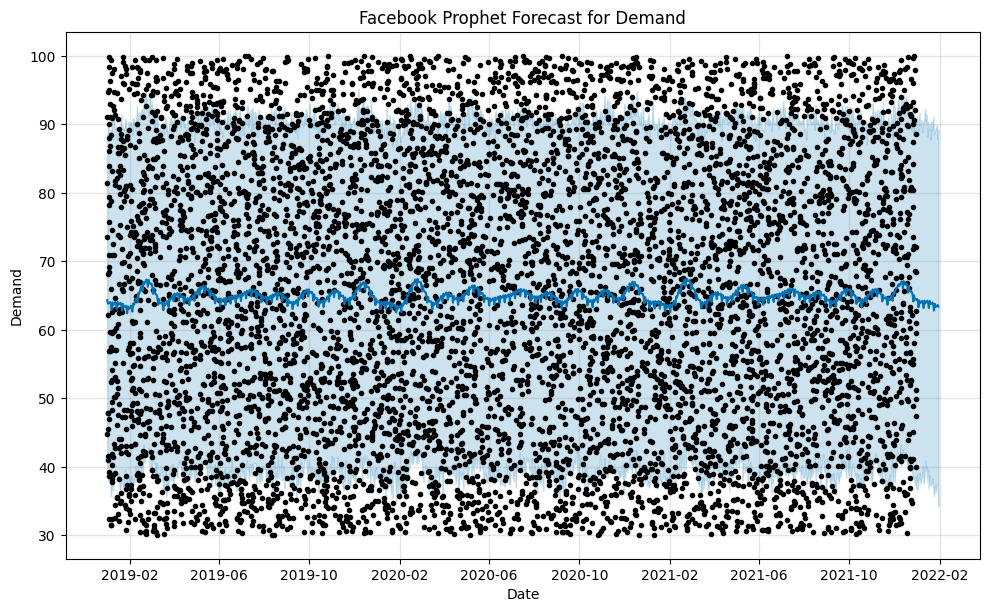

In [11]:
# Plot the results
fig = model.plot(forecast)
plt.title('Facebook Prophet Forecast for Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

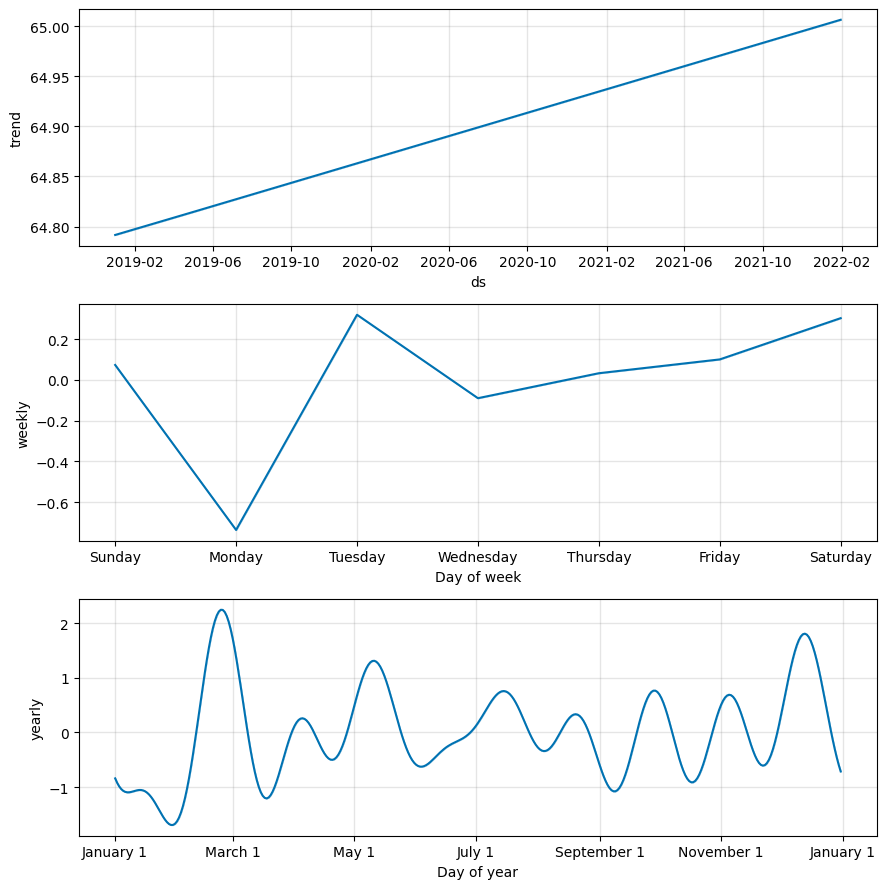

In [12]:
# Optional: Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()